In [3]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import models 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sean/anaconda3/envs/tf-gpu-c

In [4]:
df_pions = pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Djuna_Data_Generation_Notebook/noshift1.csv',header = None)

def data_normaliser(data):
    mean = np.mean(data, axis = 0)
    std = np.std(data,axis = 0)
    return (data -mean)/std 

In [5]:
train_x, train_y = df_pions.iloc[:-1000,:8], df_pions.iloc[:-1000,-1]
val_x, val_y = df_pions.iloc[-1000:,:8], df_pions.iloc[-1000:,-1]

In [64]:
class network():
    def __init__(self,train_x,train_y,val_x,val_y, layer_shapes, optimizer = 'Adam', ):
        self.train_x = train_x
        self.train_y = train_y
        self.val_x = val_x
        self.val_y = val_y
        self.optimizer = optimizer
        self.layer_shapes = layer_shapes
    def build(self,model_summary = False):
        print(self.layer_shapes)
        model = models.Sequential()
        ##Layers 
        model.add(layers.Dense(self.layer_shapes[0],activation= 'relu',input_shape = (train_x.shape[1],)))
        for i in range(1,len(self.layer_shapes)):
            print(i)
            model.add(layers.Dense(self.layer_shapes[i],activation = 'relu'))
        model.add(layers.Dense(1))
        model.compile(optimizer = self.optimizer,loss = 'mse', metrics = ['mean_absolute_percentage_error'])
        
        if model_summary:
            model.summary()
        
        return model

#### I fucking Hate How many hyperparameters there are 
class trained_network(network):
    def __init__(self,train_x,train_y,val_x,val_y, layer_shapes, optimizer = 'Adam', verbose = 0,epochs = 100):
        super().__init__(train_x,train_y,val_x,val_y, layer_shapes, optimizer)
        #print(layer_shapes)
        super().build()
        self.verbose  = verbose
        self.epochs = epochs 
        network = self.build()
        def fit(self):
            net_hist = network.fit( self.train_x, self.train_y, validation_data = (self.val_x,self.val_y), verbose  = self.verbose, epochs = self.epochs)
            return net_hist
        self.history = self.fit().history 
        

### What do I want out of this??
#- Be able to vary shape of network easily 
#- Output Basic plot for fast comparison
#- Output History data for more in depth comparison 
#- I would quite like to automate my testing, so say I pass list of [[3,36],[2.36]...etc] it runs and stores some measure of how good these were, often interpreting the data requires a graph so maybe it needs to plot a bunch of subplots
#- Save Fig 
#- Diff Optimisers 



## Definin



In [61]:
inital_test = trained_network(train_x,train_y,val_x,val_y,[32,32]).history

[32, 32]
1
[32, 32]
1


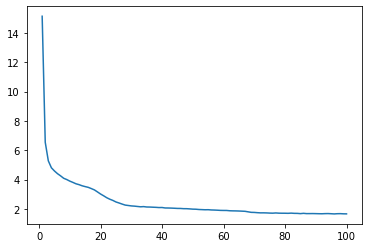

In [63]:
plt.plot(range(1,101),inital_test['mean_absolute_percentage_error'])